In [330]:
import pandas as pd

In [331]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 20)

In [332]:
welddb_data_path = "welddb/welddb.data"

In [333]:
columns = [
    "Carbon concentration / (weight%)",
    "Silicon concentration / (weight%)",
    "Manganese concentration / (weight%)",
    "Sulphur concentration / (weight%)",
    "Phosphorus concentration / (weight%)",
    "Nickel concentration / (weight%)",
    "Chromium concentration / (weight%)",
    "Molybdenum concentration / (weight%)",
    "Vanadium concentration / (weight%)",
    "Copper concentration / (weight%)",
    "Cobalt concentration / (weight%)",
    "Tungsten concentration / (weight%)",
    "Oxygen concentration / parts per million by weight",
    "Titanium concentration / parts per million by weight",
    "Nitrogen concentration / parts per million by weight",
    "Aluminium concentration / parts per million by weight",
    "Boron concentration / parts per million by weight",
    "Niobium concentration / parts per million by weight",
    "Tin concentration / parts per million by weight",
    "Arsenic concentration / parts per million by weight",
    "Antimony concentration / parts per million by weight",
    "Current / A",
    "Voltage / V",
    "AC or DC",
    "Electrode positive or negative",
    "Heat input / kJ/mm",
    "Interpass temperature / deg C",
    "Type of weld; ShMA = MMA = manual metal arc, SA = SMA = submerged arc, FCA = flux cored arc, GTAA gas tungsten arc automatic, GMAA gas metal arc automatic, SAW-NG = submerged arc narrow gap, GMA-NG = gas metal arc narrow gap, ES = electroslag, TSA = tandem submerged arc.",
    "Post weld heat treatment temperature / deg C",
    "Post weld heat treatment time / hours",
    "Yield strength / MPa",
    "Ultimate tensile strength / MPa",
    "Elongation / %",
    "Reduction of Area / %",
    "Charpy temperature / deg C",
    "Charpy impact toughness / J",
    "Hardness / kg/mm2",
    "50 % FATT",
    "Primary ferrite in microstructure / %",
    "Ferrite with second phase / %",
    "Acicular ferrite / %",
    "Martensite / %",
    "Ferrite with carbide aggreagate / %",
    "Weld ID",
]

In [334]:
columns = [
    "carbon_pct",
    "silicon_pct",
    "manganese_pct",
    "sulphur_pct",
    "phosphorus_pct",
    "nickel_pct",
    "chromium_pct",
    "molybdenum_pct",
    "vanadium_pct",
    "copper_pct",
    "cobalt_pct",
    "tungsten_pct",
    "oxygen_ppm",
    "titanium_ppm",
    "nitrogen_ppm",
    "aluminium_ppm",
    "boron_ppm",
    "niobium_ppm",
    "tin_ppm",
    "arsenic_ppm",
    "antimony_ppm",
    "current_a",
    "voltage_v",
    "ac_dc",
    "electrode_polarity",
    "heat_input_kj_mm",
    "interpass_temp_c",
    "weld_type",
    "post_weld_temp_c",
    "post_weld_time_hr",
    "yield_strength_mpa",
    "ultimate_tensile_strength_mpa",
    "elongation_pct",
    "reduction_area_pct",
    "charpy_temp_deg_c",
    "charpy_impact_toughness_j",
    "hardness_kg_mm2",
    "fifty_pct_fatt",
    "primary_ferrite_pct",
    "ferrite_second_phase_pct",
    "acicular_ferrite_pct",
    "martensite_pct",
    "ferrite_carbide_aggregate_pct",
    "weld_id",
]


In [335]:
weld_df = pd.read_csv(
    welddb_data_path, sep=r"\s+", header=None, names=columns, na_values="N"
)

# Variable selection


In [336]:
# Input variables (features)

material_composition_variables = [
    "carbon_pct",
    "silicon_pct",
    "manganese_pct",
    "sulphur_pct",
    "phosphorus_pct",
    "nickel_pct",
    "chromium_pct",
    "molybdenum_pct",
    "vanadium_pct",
    "copper_pct",
    "cobalt_pct",
    "tungsten_pct",
    "oxygen_ppm",
    "titanium_ppm",
    "nitrogen_ppm",
    "aluminium_ppm",
    "boron_ppm",
    "niobium_ppm",
    "tin_ppm",
    "arsenic_ppm",
    "antimony_ppm",
]


welding_process_variables = [
    "current_a",
    "voltage_v",
    "ac_dc",
    "electrode_polarity",
    "heat_input_kj_mm",
    "interpass_temp_c",
    "weld_type",
    "post_weld_temp_c",
    "post_weld_time_hr",
]


# Output variables (targets)

mechanical_properties_variables = [
    "yield_strength_mpa",
    "ultimate_tensile_strength_mpa",
    "elongation_pct",
    "reduction_area_pct",
    "charpy_temp_deg_c",
    "charpy_impact_toughness_j",
    "hardness_kg_mm2",
    "fifty_pct_fatt",
]

microstructure_variables = [
    "primary_ferrite_pct",
    "ferrite_second_phase_pct",
    "acicular_ferrite_pct",
    "martensite_pct",
    "ferrite_carbide_aggregate_pct",
]


# Miscellaneous variables

misc_variables = ["weld_id"]

In [337]:
variables_to_remove = []

# Remove variables with more than 80% missing values
variables_to_remove.extend(
    ["tungsten_pct", "cobalt_pct", "arsenic_ppm", "antimony_ppm", "tin_ppm"]
)

# Remove variables with too many non-numeric values
variables_to_remove.append("boron_ppm")

# Update the list of material composition variables
material_composition_variables = [
    var for var in material_composition_variables if var not in variables_to_remove
]

# Update the dataframe
weld_df.drop(columns=variables_to_remove, inplace=True)

In [338]:
# Remove these output variables because they have over 90% missing values
weld_df.drop(columns=["hardness_kg_mm2", "fifty_pct_fatt"], inplace=True)

# Remove microstructure variables because it is more interesting to predict mechanical properties and they have over 94% missing values
weld_df.drop(columns=microstructure_variables, inplace=True)

In [339]:
# Extract the numeric part of the 'nitrogen_ppm' column
weld_df["nitrogen_ppm"] = weld_df["nitrogen_ppm"].str.split("tot").str[0].astype(float)

# Variable imputation


In [340]:
import sklearn
assert sklearn.__version__ >= "0.20"
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
import numpy as np
from numpy import nan

In [341]:
#Remove weld_id since it doesn't give information
input_df = weld_df.copy()
input_df.drop(columns=["weld_id"], inplace=True)

#Remove outputs since we won't do imputation on them
outputs = [
    "yield_strength_mpa",
    "ultimate_tensile_strength_mpa",
    "elongation_pct",
    "reduction_area_pct",
    "charpy_temp_deg_c",
    "charpy_impact_toughness_j"
]
input_df.drop(columns = outputs, inplace = True)

In [342]:
#Preprocess column with classes

input_df = input_df[~input_df['weld_type'].isin(["GTAA", "GMAA", "SAA","NGGMA","NGSAW" ])] #Delete rows for 5 classes with a total a 37/1652 instances

# We add a column for each class
input_df["weld_type_MMA"] = np.where(input_df["weld_type"] == "MMA", 1.0, 0.0)
input_df["weld_type_SA"] = np.where(input_df["weld_type"] == "SA", 1.0, 0.0)
input_df["weld_type_TSA"] = np.where(input_df["weld_type"] == "TSA", 1.0, 0.0)
input_df["weld_type_FCA"] = np.where(input_df["weld_type"] == "FCA", 1.0, 0.0)
input_df["weld_type_ShMA"] = np.where(input_df["weld_type"] == "ShMA", 1.0, 0.0)
## REMOVE ONE OF THEM FOR LESS CORELATION

input_df["electrode_polarity_nan"] = np.where(pd.isna(input_df["ac_dc"]), nan, 0) #We keep NaN
input_df["electrode_polarity"] = np.where(input_df["electrode_polarity"] == "+", 1.0, 0.0)+ input_df["electrode_polarity_nan"] #1 if + 0 if -

input_df["ac_dc_nan"] = np.where(pd.isna(input_df["ac_dc"]), nan, 0) #We keep NaN
input_df["ac_dc"] = np.where(input_df["ac_dc"] == "AC", 1.0, 0.0) + input_df["ac_dc_nan"] # 1 if ac 0 if dc


columns_to_drop = ["weld_type","ac_dc_nan","electrode_polarity_nan"] #Drop original class columns and nan columns
input_df.drop(columns=columns_to_drop, inplace=True)


In [343]:
print(input_df.shape)
input_df.describe()

(1615, 28)


,carbon_pct,silicon_pct,manganese_pct,phosphorus_pct,nickel_pct,chromium_pct,oxygen_ppm,nitrogen_ppm,current_a,voltage_v,ac_dc,electrode_polarity,heat_input_kj_mm,post_weld_temp_c,post_weld_time_hr,weld_type_MMA,weld_type_SA,weld_type_TSA,weld_type_FCA,weld_type_ShMA
count,1615.000000,1615.000000,1615.000000,1605.000000,660.000000,747.000000,1233.000000,1230.000000,1367.000000,1367.000000,1400.000000,1400.000000,1615.000000,1602.000000,1602.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000
mean,0.075083,0.329721,1.217022,0.013036,0.429105,1.981416,441.898621,108.488618,279.582297,27.575538,0.027143,0.967857,1.692000,295.355181,4.979014,0.705882,0.161610,0.053870,0.053870,0.024768
std,0.023854,0.112572,0.374465,0.019841,0.806317,2.983767,145.089600,91.848610,192.879366,12.684031,0.162558,0.176442,1.307125,282.006371,6.126660,0.455786,0.368207,0.225831,0.225831,0.155465
min,0.029000,0.040000,0.270000,0.002000,0.000000,0.000000,132.000000,21.000000,115.000000,20.000000,0.000000,0.000000,0.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.061000,0.270000,0.970000,0.007000,0.000000,0.000000,371.000000,67.000000,170.000000,21.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.074000,0.320000,1.300000,0.010000,0.060000,0.410000,423.000000,81.500000,170.000000,21.000000,0.000000,1.000000,1.000000,250.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.082000,0.360000,1.450000,0.014000,0.270000,2.300000,470.000000,101.000000,300.000000,30.000000,0.000000,1.000000,2.000000,580.000000,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,0.180000,1.140000,2.250000,0.250000,3.500000,10.200000,1650.000000,552.000000,900.000000,75.360000,1.000000,1.000000,7.900000,760.000000,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [344]:
#Impute for non numerical values

for c in input_df.columns : # we check each cell of input_df to transform it into a float
    str_indexes =[]
    float_values = []
    for k in input_df.index:
        cell = input_df.loc[k,c]
        if type(cell) == str : 
            try :
                input_df.loc[k,c] = float(cell) #transform cell into float if possible
                float_values.append(float(cell))
            except Exception :
                str_indexes.append(k)
    for j in str_indexes : #different cases if cell couldn't be transformed into float
        cell = input_df.loc[j,c] 
        if '<'in cell : # cell of form "<x" takes the mean of the values < x
            max = float(cell.replace("<",""))
            L_cell = [x for x in float_values if x < max]
            if len(L_cell) == 0 : # if no values < x takes x
                input_df.loc[j,c] = max
            else :
                input_df.loc[j,c] = sum(L_cell)/len(L_cell)
        elif "-" in cell : # cell of form "x1-x2" Takes the mean of the x1 < values < x2
            min,max = float(cell.split("-")[0]), float(cell.split("-")[1])
            L_cell = [x for x in float_values if min < x < max]
            if len(L_cell) == 0 : # if no  x1 <values < x2 takes (x1+x2)/2
                input_df.loc[j,c] = (min+max)/2
            else :
                input_df.loc[j,c] = sum(L_cell)/len(L_cell)
        else : 
            raise ValueError("This case is not treated")

In [345]:
# Impute for nan

imputer = IterativeImputer(sample_posterior=True)
input_np = input_df.copy().to_numpy()
input_np = imputer.fit_transform(input_np)
input_df = pd.DataFrame(input_np, columns = input_df.columns, index=input_df.index)

# Assert values are between 0 and 100 for pct
columns_pct =[
    "sulphur_pct",
    "phosphorus_pct",
    "nickel_pct",
    "chromium_pct",
    "molybdenum_pct",
    "vanadium_pct",
    "copper_pct"]
for c in columns_pct :
    input_df[c] = np.where( input_df[c] < 0.0, 0.0, input_df[c] )
    input_df[c] = np.where( input_df[c] > 100.0, 100.0, input_df[c] )

#Assert values or either 0 or 1 for binary classes
columns_classes = [
    "electrode_polarity",
    "ac_dc"]
for c in columns_classes :
    input_df[c] = np.where( input_df[c] < 0.5, 0.0, input_df[c] )
    input_df[c] = np.where( input_df[c] >= 0.5, 1.0, input_df[c])

# Assert values are superior to 0 for other features
columns_other =["oxygen_ppm",
    "titanium_ppm",
    "nitrogen_ppm",
    "aluminium_ppm",
    "niobium_ppm",
    "current_a",
    "voltage_v",
    "interpass_temp_c",
    "post_weld_temp_c",
    "post_weld_time_hr"]
for c in columns_other :
    input_df[c] = np.where( input_df[c] < 0.0, 0.0, input_df[c] )

    
# There are some features that don't need to be checked because there is no imputation such as carbon_pct or weld_type_MMA for instance


# Scaling

In [346]:
input_df.describe()

,carbon_pct,silicon_pct,manganese_pct,sulphur_pct,phosphorus_pct,nickel_pct,chromium_pct,molybdenum_pct,vanadium_pct,copper_pct,oxygen_ppm,titanium_ppm,nitrogen_ppm,aluminium_ppm,niobium_ppm,current_a,voltage_v,ac_dc,electrode_polarity,heat_input_kj_mm,interpass_temp_c,post_weld_temp_c,post_weld_time_hr,weld_type_MMA,weld_type_SA,weld_type_TSA,weld_type_FCA,weld_type_ShMA
count,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000
mean,0.075083,0.329721,1.217022,0.009556,0.013208,0.652432,2.025281,0.331116,0.047446,0.214896,438.590356,74.680837,114.002655,107.417249,144.631008,273.262505,27.048431,0.026006,0.967183,1.692000,203.959460,294.143784,4.964867,0.705882,0.161610,0.053870,0.053870,0.024768
std,0.023854,0.112572,0.374465,0.011330,0.020467,0.764608,2.695242,0.401468,0.074017,0.286506,148.328917,90.296379,91.741536,132.691439,197.533244,186.507494,12.230031,0.159203,0.178213,1.307125,39.435205,281.580948,6.110181,0.455786,0.368207,0.225831,0.225831,0.155465
min,0.029000,0.040000,0.270000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.748784,0.000000,0.000000,0.000000,0.000000,61.851974,9.703629,0.000000,0.000000,0.600000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.061000,0.270000,0.970000,0.006000,0.007000,0.010000,0.000000,0.000000,0.000179,0.000000,360.000000,8.000000,67.000000,2.000000,0.000000,170.000000,21.000000,0.000000,1.000000,1.000000,200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.074000,0.320000,1.300000,0.007000,0.010000,0.314640,0.923117,0.149892,0.010000,0.105000,423.000000,40.000000,84.000000,56.149937,50.000000,170.000000,21.000000,0.000000,1.000000,1.000000,200.000000,250.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.082000,0.360000,1.450000,0.010000,0.014000,1.082795,2.579167,0.540382,0.069904,0.325447,479.000000,110.000000,123.000000,170.000000,220.364677,300.000000,30.000000,0.000000,1.000000,2.000000,200.000000,580.000000,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,0.180000,1.140000,2.250000,0.140000,0.250000,3.500000,12.950568,1.694720,0.320000,1.630000,1650.000000,690.000000,552.000000,680.000000,1000.000000,900.000000,79.153841,1.000000,1.000000,7.900000,300.000000,760.000000,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [347]:
# Scale the data 
temp_df = input_df.copy()
temp_df.drop(columns = columns_classes, inplace= True) # we don't rescale for the classes

# Min-max scaling for during-process variables
columns_to_min_max = ["heat_input_kj_mm", "interpass_temp_c", "post_weld_temp_c", "post_weld_time_hr"]
transformer_min_max = MinMaxScaler()
temp_df[columns_to_min_max] = transformer_min_max.fit_transform(temp_df[columns_to_min_max])

# Scaling percent with an enlarged robust scaler :
columns_pct = [col for col in  temp_df.columns if "pct" in col]
transformer_robust1 = RobustScaler(quantile_range=(10.0,90.0))
temp_df[columns_pct] = transformer_robust1.fit_transform(temp_df[columns_pct])

# Robust scaling for other metric variables
columns_to_scale = [col for col in temp_df.columns if (col not in set(columns_to_min_max) | set(columns_pct))]
transformer_robust2 = RobustScaler(quantile_range=(25.0,75.0))
temp_df[columns_to_scale] = transformer_robust2.fit_transform(temp_df[columns_to_scale])

input_df.drop(columns=columns_pct+columns_other,inplace=True) #Add the nonscaled classes
input_df = pd.concat([temp_df, input_df], axis = 1)

In [348]:
input_df.describe()

,carbon_pct,silicon_pct,manganese_pct,sulphur_pct,phosphorus_pct,nickel_pct,chromium_pct,molybdenum_pct,vanadium_pct,copper_pct,oxygen_ppm,titanium_ppm,nitrogen_ppm,aluminium_ppm,niobium_ppm,current_a,voltage_v,heat_input_kj_mm,interpass_temp_c,post_weld_temp_c,post_weld_time_hr,weld_type_MMA,weld_type_SA,weld_type_TSA,weld_type_FCA,weld_type_ShMA,ac_dc,electrode_polarity,heat_input_kj_mm,weld_type_MMA,weld_type_SA,weld_type_TSA,weld_type_FCA,weld_type_ShMA
count,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000
mean,0.016666,0.038885,-0.076127,0.255604,0.229158,0.190375,0.168970,0.178561,0.208031,0.189107,0.131011,0.340008,0.535762,0.305163,0.429429,0.794327,0.672048,0.149589,0.656998,0.387031,0.206869,-0.294118,0.161610,0.053870,0.053870,0.024768,0.026006,0.967183,1.692000,0.705882,0.161610,0.053870,0.053870,0.024768
std,0.366989,0.450287,0.343546,1.133014,1.461923,0.430922,0.413200,0.395568,0.411208,0.493016,1.246461,0.885259,1.638242,0.789830,0.896393,1.434673,1.358892,0.179058,0.140840,0.370501,0.254591,0.455786,0.368207,0.225831,0.225831,0.155465,0.159203,0.178213,1.307125,0.455786,0.368207,0.225831,0.225831,0.155465
min,-0.692308,-1.120000,-0.944954,-0.700000,-0.714286,-0.177326,-0.141521,-0.147690,-0.055556,-0.180682,-3.304632,-0.392157,-1.500000,-0.334226,-0.226897,-0.831908,-1.255152,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.600000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.200000,-0.200000,-0.302752,-0.100000,-0.214286,-0.171690,-0.141521,-0.147690,-0.054563,-0.180682,-0.529412,-0.313725,-0.303571,-0.322321,-0.226897,0.000000,0.000000,0.054795,0.642857,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.054795,0.642857,0.328947,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.123077,0.160000,0.137615,0.300000,0.285714,0.432921,0.253884,0.384752,0.332798,0.379342,0.470588,0.686275,0.696429,0.677679,0.773103,1.000000,1.000000,0.191781,0.642857,0.763158,0.416667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.630769,3.280000,0.871560,13.300000,17.142857,1.795221,1.843895,1.522127,1.722222,2.624198,10.310924,6.372549,8.357143,3.713393,4.311036,5.615385,6.461538,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.900000,1.000000,1.000000,1.000000,1.000000,1.000000


# Output preparation

In [349]:
output_df = weld_df[outputs + ["weld_type"]].copy()

# Listwise delition on the same insatnces as the input
output_df = output_df[~output_df['weld_type'].isin(["GTAA", "GMAA", "SAA","NGGMA","NGSAW" ])] #Delete rows for 5 classes with a total a 37/1652 instances
output_df.drop(columns=["weld_type"], inplace=True)

In [350]:
import itertools

# Which columns to combine to create a score, whithout dropping to many instances ?

min_nb_of_instances = 500

for nb_col_combinations in range(1, len(outputs)+1):

    # Create all unique sets of columns
    column_sets = list(itertools.combinations(outputs, nb_col_combinations))

    non_nan_set_counts = {}

    for col_set in column_sets:
        # Drop rows with NaN in either column and count the non-NaN rows
        count_non_nan = output_df[list(col_set)].dropna().shape[0]
        if count_non_nan >= min_nb_of_instances:
            non_nan_set_counts[col_set] = count_non_nan

    # Print the results
    if len(non_nan_set_counts)>0:
        print(f"\n{nb_col_combinations}-score :")
        for col_set, count in non_nan_set_counts.items():
            print(f"Non-NaN rows for columns {col_set} : {count}")


1-score :
Non-NaN rows for columns ('yield_strength_mpa',) : 762
Non-NaN rows for columns ('ultimate_tensile_strength_mpa',) : 720
Non-NaN rows for columns ('elongation_pct',) : 682
Non-NaN rows for columns ('reduction_area_pct',) : 693
Non-NaN rows for columns ('charpy_temp_deg_c',) : 860
Non-NaN rows for columns ('charpy_impact_toughness_j',) : 860

2-score :
Non-NaN rows for columns ('yield_strength_mpa', 'ultimate_tensile_strength_mpa') : 696
Non-NaN rows for columns ('yield_strength_mpa', 'elongation_pct') : 673
Non-NaN rows for columns ('yield_strength_mpa', 'reduction_area_pct') : 684
Non-NaN rows for columns ('ultimate_tensile_strength_mpa', 'elongation_pct') : 648
Non-NaN rows for columns ('ultimate_tensile_strength_mpa', 'reduction_area_pct') : 659
Non-NaN rows for columns ('elongation_pct', 'reduction_area_pct') : 673
Non-NaN rows for columns ('charpy_temp_deg_c', 'charpy_impact_toughness_j') : 860

3-score :
Non-NaN rows for columns ('yield_strength_mpa', 'ultimate_tensile

In [351]:
# We choose the following score :

# 3-score :
# ('yield_strength_mpa', 'ultimate_tensile_strength_mpa', 'elongation_pct') : 647

# UTS is the maximum tensile stress a material can withstand before breaking. It indicates how much force the solder can resist in tension before it fails.
# A higher UTS means the solder can bear more significant mechanical loads without failing. This is crucial in structural soldering.

# Yield strength is the stress at which a material begins to deform plastically.
# Solder with moderate yield strength ensures that the joint can flex and accommodate small stresses without permanent deformation.

# Elongation measures a material's ductility, or its ability to deform plastically without breaking. 
# In structural soldering, joints are often subjected to repeated stresses (due to temperature changes, vibrations, etc.). 
# A ductile solder can absorb these stresses by stretching slightly rather than failing suddenly

In [352]:
# We use the set ('yield_strength_mpa', 'ultimate_tensile_strength_mpa', 'elongation_pct') to create a score for 647 / 1615 (40%) of the instances

from sklearn.preprocessing import RobustScaler

ys_ratio, uts_ratio, elong_ratio = 1.0, 3.0, 1.0
scaler_out = RobustScaler()

score_arr = np.transpose(scaler_out.fit_transform(output_df[["yield_strength_mpa","ultimate_tensile_strength_mpa","elongation_pct"]]))
output_df["score"] = ys_ratio * score_arr[0] + uts_ratio * score_arr[1] + elong_ratio * score_arr[2]

In [353]:
output_df.describe()

,yield_strength_mpa,ultimate_tensile_strength_mpa,elongation_pct,reduction_area_pct,charpy_temp_deg_c,charpy_impact_toughness_j,score
count,762.000000,720.000000,682.000000,693.000000,860.000000,860.000000,647.000000
mean,506.671391,591.727917,26.365103,71.875758,-34.997674,87.067442,0.402398
std,92.090790,87.241725,4.901947,8.967958,34.756897,49.363140,2.624994
min,315.000000,447.000000,10.600000,17.000000,-114.000000,3.000000,-4.714286
25%,443.000000,531.000000,23.000000,68.000000,-60.000000,38.000000,-1.387476
50%,494.000000,573.000000,27.000000,75.000000,-40.000000,100.000000,-0.095463
75%,555.000000,642.000000,30.000000,78.000000,-18.750000,100.000000,1.828475
max,920.000000,1151.000000,37.000000,83.000000,188.000000,233.000000,17.082336


In [354]:
output_df_score = pd.DataFrame(output_df["score"], columns= ["score"])
output_df_score.describe()

,score
count,647.000000
mean,0.402398
std,2.624994
min,-4.714286
25%,-1.387476
50%,-0.095463
75%,1.828475
max,17.082336


In [355]:
output_df_class = output_df_score.copy()
q1,q3 = output_df_score["score"].quantile([0.25, 0.75])
print(f"Q1 of score (25%) : {q1}")
print(f"Q3 of score (75%) : {q3}")


output_df_class["score_nan"] = np.where(pd.isna(output_df_class["score"]), nan, 0) #We keep NaN
output_df_class["class_bad"] = np.where( output_df_class["score"] <= q1, 1.0, 0) + output_df_class["score_nan"]
output_df_class["class_good"] = np.where( (q1 <= output_df_class["score"]) & (output_df_class["score"] <= q3), 1.0, 0) + output_df_class["score_nan"]
output_df_class["class_very_good"] = np.where( output_df_class["score"] >= q3, 1.0, 0) + output_df_class["score_nan"]

output_df_class.drop(columns = ["score","score_nan"], inplace = True)

output_df_class.describe()


Q1 of score (25%) : -1.3874758687258684
Q3 of score (75%) : 1.8284749034749037


,class_bad,class_good,class_very_good
count,647.000000,647.000000,647.000000
mean,0.250386,0.499227,0.250386
std,0.433571,0.500386,0.433571
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.500000,1.000000,0.500000
max,1.000000,1.000000,1.000000


# PCA

In [356]:
from sklearn.decomposition import PCA
import pandas as pd

explained_variance_traget = 0.95

categorical_columns = ["ac_dc", "electrode_polarity","weld_type_MMA","weld_type_SA","weld_type_TSA","weld_type_FCA","weld_type_ShMA"]
numerical_df = input_df.drop(columns=categorical_columns)
categorical_df = input_df[categorical_columns]

pca = PCA(0.9) # Select components such that the amount of variance that needs to be explained is greater than 90%
principal_components = pca.fit_transform(numerical_df)
pca_columns = [f'PC{i+1}' for i in range(principal_components.shape[1])]
# pca_df = pd.DataFrame(principal_components, columns=pca_columns)
pca_df = pd.DataFrame(principal_components, columns=pca_columns, index=input_df.index)

# input_df_pca = pd.concat([pca_df, categorical_df.reset_index(drop=True)], axis=1)
input_df_pca = pd.concat([pca_df, categorical_df], axis=1)

print(f"[ PCA pour un explicabilité de la variance de {explained_variance_traget * 100} % ]")
print(f"{numerical_df.shape[1]} composantes numériques --> {principal_components.shape[1]} composantes principales")

print("\nDataset final avec les composantes PCA  et  les colonnes catégoriques :")
input_df_pca.describe()

[ PCA pour un explicabilité de la variance de 95.0 % ]
22 composantes numériques --> 8 composantes principales

Dataset final avec les composantes PCA  et  les colonnes catégoriques :


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,ac_dc,electrode_polarity,weld_type_MMA,weld_type_MMA,weld_type_SA,weld_type_SA,weld_type_TSA,weld_type_TSA,weld_type_FCA,weld_type_FCA,weld_type_ShMA,weld_type_ShMA
count,1.615000e+03,1.615000e+03,1.615000e+03,1.615000e+03,1.615000e+03,1.615000e+03,1.615000e+03,1.615000e+03,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000
mean,7.039433e-17,8.799291e-18,5.279575e-17,1.759858e-17,7.039433e-17,4.399645e-17,-2.639787e-17,-4.399645e-18,0.026006,0.967183,-0.294118,0.705882,0.161610,0.161610,0.053870,0.053870,0.053870,0.053870,0.024768,0.024768
std,2.261845e+00,1.938981e+00,1.613556e+00,1.233369e+00,9.369177e-01,8.770052e-01,7.075418e-01,6.671418e-01,0.159203,0.178213,0.455786,0.455786,0.368207,0.368207,0.225831,0.225831,0.225831,0.225831,0.155465,0.155465
min,-2.447132e+00,-3.080136e+00,-4.141005e+00,-3.554830e+00,-1.995100e+00,-2.999795e+00,-2.284312e+00,-2.507337e+00,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-1.354105e+00,-9.831055e-01,-6.105459e-01,-7.279992e-01,-6.544393e-01,-3.794192e-01,-4.448613e-01,-3.290489e-01,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-1.194203e+00,-5.247100e-01,2.699672e-01,3.094139e-02,-2.005577e-01,-9.705365e-02,-1.726588e-01,-4.506683e-02,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.384146e-01,3.222094e-01,6.127643e-01,5.512352e-01,4.106721e-01,5.100311e-01,3.960966e-01,3.011103e-01,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.547502e+00,1.228129e+01,1.524665e+01,8.919962e+00,5.978543e+00,3.155768e+00,3.217921e+00,2.771254e+00,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [359]:
# Principal components visualization

try :
    import plotly.express as px

    loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

    fig = px.scatter(input_df_pca[pca_columns], x="PC1", y="PC2")

    for i, feature in enumerate(numerical_df.columns):
        fig.add_annotation(
            ax=0, ay=0,
            axref="x", ayref="y",
            x=loadings[i, 0],
            y=loadings[i, 1],
            showarrow=True,
            arrowsize=2,
            arrowhead=2,
            xanchor="right",
            yanchor="top"
        )
        fig.add_annotation(
            x=loadings[i, 0],
            y=loadings[i, 1],
            ax=0, ay=0,
            xanchor="center",
            yanchor="bottom",
            text=feature,
            yshift=5,
        )
    fig.update_layout(
        title={
            'text': "Biplot visualization of PCA",
            'y':0.95,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'}
    )
    fig.show()
except Exception:
    print("plotly.express is needed for PCA components visualization")


Text(0.5, 1.0, 'The effect of features on each components')

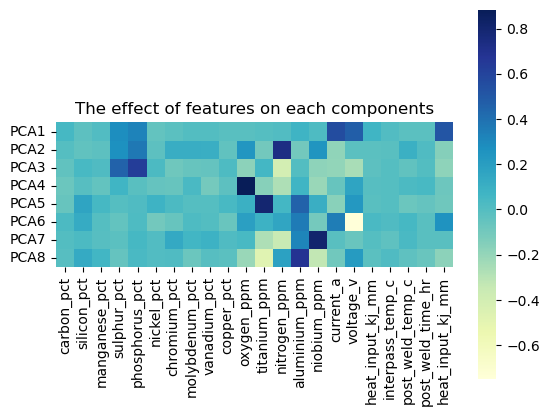

In [360]:
# Effect of variables on each components
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.heatmap(pca.components_,
                 cmap='YlGnBu',
                 yticklabels=[ "PCA"+str(X_test) for X_test in range(1,pca.n_components_+1)],
                 xticklabels=list(numerical_df.columns),
                 cbar_kws={"orientation": "vertical"})
plt.yticks(rotation=0)
ax.set_aspect("equal")
plt.title('The effect of features on each components')

# Save dataset after preprocessing

In [361]:
input_df_pca.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1642, 1643, 1644, 1645, 1646, 1647, 1648, 1649, 1650, 1651],
           dtype='int64', length=1615)

In [362]:
assert(input_df.index.equals(output_df.index))
assert(input_df.index.equals(input_df_pca.index))

In [363]:
input_df.to_csv("input_df.csv")
input_df_pca.to_csv("input_df_pca.csv")
output_df_class.to_csv("output_df_class.csv")
output_df_score.to_csv("output_df_score.csv")